### RFM 분석 실습
- Recency: 얼마나 최근에 구매했는가
- Frequency: 얼마나 자주 구매했는가
- Monetary: 얼마나 많은 금액을 지출했는가


In [1]:
# 빈도수가 부족하다면 구매한수량으로 대체

### 고객 분석
- CustomerID: 고객 번호
- PurchaseDate: 구매 날짜
- TransactionAmount: 결제 금액 
- ProductInformation: 상품 정보
- OrderID: 주문 번호
- Location: 주문 지역

In [2]:
# 기획 -> 국가별 회원들의 구매 경향을 분석해서 마케팅 전략 보고서를 작성 

In [3]:
import pandas as pd
cp_df = pd.read_csv('./datasets/customer_order_data.csv')
display(cp_df)

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
0,8814,2023-04-11,943.31,Product C,890075,Tokyo
1,2188,2023-04-11,463.70,Product A,176819,London
2,4608,2023-04-11,80.28,Product A,340062,New York
3,2559,2023-04-11,221.29,Product A,239145,London
4,9482,2023-04-11,739.56,Product A,194545,Paris
...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London
996,6669,2023-06-10,941.50,Product C,987025,New York
997,8836,2023-06-10,545.36,Product C,512842,London
998,1440,2023-06-10,729.94,Product B,559753,Paris


In [4]:
display(cp_df.head(10)) # 상위 10개 추출 

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
0,8814,2023-04-11,943.31,Product C,890075,Tokyo
1,2188,2023-04-11,463.70,Product A,176819,London
2,4608,2023-04-11,80.28,Product A,340062,New York
3,2559,2023-04-11,221.29,Product A,239145,London
4,9482,2023-04-11,739.56,Product A,194545,Paris
5,8483,2023-04-11,375.23,Product C,691194,Paris
6,8317,2023-04-11,272.56,Product B,826847,New York
7,6911,2023-04-11,433.33,Product C,963918,Tokyo
8,8993,2023-04-12,16.55,Product D,112426,New York
9,3519,2023-04-12,464.63,Product C,139726,New York


In [5]:
display(cp_df.tail(10)) # 하위 10개 추출 

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
990,6570,2023-06-10,125.84,Product C,664032,Paris
991,1029,2023-06-10,704.99,Product D,992083,New York
992,5938,2023-06-10,219.12,Product B,901280,Paris
993,1990,2023-06-10,791.40,Product C,759104,Tokyo
994,4982,2023-06-10,624.79,Product B,972881,Paris
995,2970,2023-06-10,759.62,Product B,275284,London
996,6669,2023-06-10,941.50,Product C,987025,New York
997,8836,2023-06-10,545.36,Product C,512842,London
998,1440,2023-06-10,729.94,Product B,559753,Paris
999,4759,2023-06-10,804.28,Product D,467544,New York


In [6]:
cp_df.info()  # 데이터 정보 확인 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          1000 non-null   int64  
 1   PurchaseDate        1000 non-null   object 
 2   TransactionAmount   1000 non-null   float64
 3   ProductInformation  1000 non-null   object 
 4   OrderID             1000 non-null   int64  
 5   Location            1000 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 47.0+ KB


In [7]:
# feature명 변경 
cp_df = cp_df.rename(columns = {'ProductInformation':'Product'})
cp_df = cp_df.rename(columns = {'TransactionAmount':'Transaction'})
cp_df = cp_df.rename(columns = {'PurchaseDate' : 'date'})
cp_df = cp_df.rename(columns = {'OrderID' : 'Order'})
cp_df = cp_df.rename(columns = {'CustomerID' : 'Customer'})

cp_df

,Customer,date,Transaction,Product,Order,Location
0,8814,2023-04-11,943.31,Product C,890075,Tokyo
1,2188,2023-04-11,463.70,Product A,176819,London
2,4608,2023-04-11,80.28,Product A,340062,New York
3,2559,2023-04-11,221.29,Product A,239145,London
4,9482,2023-04-11,739.56,Product A,194545,Paris
...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London
996,6669,2023-06-10,941.50,Product C,987025,New York
997,8836,2023-06-10,545.36,Product C,512842,London
998,1440,2023-06-10,729.94,Product B,559753,Paris


In [8]:
# 구매자는 중복 값이 있음 
# 그러므로 중복값을 제거해야함
cp_df['Customer'].value_counts()


Customer
7363    3
4804    3
5557    3
1519    2
5634    2
       ..
1341    1
8822    1
9442    1
5706    1
4759    1
Name: count, Length: 946, dtype: int64

In [9]:
cp_df.info() # 1000 -> 946

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Customer     1000 non-null   int64  
 1   date         1000 non-null   object 
 2   Transaction  1000 non-null   float64
 3   Product      1000 non-null   object 
 4   Order        1000 non-null   int64  
 5   Location     1000 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 47.0+ KB


In [10]:
# 중복행 검사
cp_df.duplicated().sum() 

0

In [11]:
# 결측치가 모두 0 인 것 을 확인 
cp_df.isnull().sum()
cp_df.isna

<bound method DataFrame.isna of      Customer        date  Transaction    Product   Order  Location
0        8814  2023-04-11       943.31  Product C  890075     Tokyo
1        2188  2023-04-11       463.70  Product A  176819    London
2        4608  2023-04-11        80.28  Product A  340062  New York
3        2559  2023-04-11       221.29  Product A  239145    London
4        9482  2023-04-11       739.56  Product A  194545     Paris
..        ...         ...          ...        ...     ...       ...
995      2970  2023-06-10       759.62  Product B  275284    London
996      6669  2023-06-10       941.50  Product C  987025  New York
997      8836  2023-06-10       545.36  Product C  512842    London
998      1440  2023-06-10       729.94  Product B  559753     Paris
999      4759  2023-06-10       804.28  Product D  467544  New York

[1000 rows x 6 columns]>

In [12]:
# 무엇을 기준점으로 삼을 것인가 -> 결제 금액 
import numpy as np

Q1 = cp_df.describe().T.loc['Transaction', '25%']
Q3 = cp_df.describe().T.loc['Transaction', '75%']

iqr = Q3 - Q1

lower_bound = Q1 - iqr * 1.5
upper_bound = Q3 + iqr * 1.5

if lower_bound < 0:
    lower_bound = 0

print(f'정상치 범위: {lower_bound} ~ {upper_bound}')

정상치 범위: 0 ~ 1513.97


In [13]:
cp_df['Product'].value_counts()

Product
Product C    277
Product D    253
Product B    245
Product A    225
Name: count, dtype: int64

In [14]:
# 상품정보 value명을 변경 A,B,C,D
cp_df['Product'] = cp_df['Product'].replace(
    ['Product A', 'Product B', 'Product C', 'Product D'], ['A', 'B', 'C', 'D']
)

cp_df['Product'].value_counts()

Product
C    277
D    253
B    245
A    225
Name: count, dtype: int64

In [15]:
# 상품정보 별로 금액을 묶어보자
# 상품 정보 별 평균 금액 
cp_df_a = cp_df.groupby('Product')['Transaction'].mean().reset_index()
display(cp_df_a)

# 상품 정보 별 최대 금액 
cp_df_b = cp_df.groupby('Product')['Transaction'].max().reset_index()
display(cp_df_b)

# 상품 정보 별 최소 금액 
cp_df_c = cp_df.groupby('Product')['Transaction'].min().reset_index()
display(cp_df_c)

# 상품 정보 별 금액 표준편차
cp_df_d = cp_df.groupby('Product')['Transaction'].std().reset_index()
display(cp_df_d)


,Product,Transaction
0,A,521.866356
1,B,502.196245
2,C,521.629928
3,D,508.807549


,Product,Transaction
0,A,999.29
1,B,997.19
2,C,999.44
3,D,996.98


,Product,Transaction
0,A,12.71
1,B,13.51
2,C,17.15
3,D,12.13


,Product,Transaction
0,A,291.742834
1,B,273.062067
2,C,293.223626
3,D,286.677402


#### 1차 분석 (상품정보 & 상품금액)
- 전반적으로 분석을 해보았을때, 평균적으로 가장 결제금액이 높은 상품은 A그룹이며, 그 다음으로 C, D, B 그룹순이다.
- 상품별 최대 결제내역은 C 그룹에서 999.44로 가장 높게 나왔으며 최소 결제내역은 D 그룹에서 12.13으로 가장 적은 최소값을 기록하였다.
- 그러나 한가지 의문점은 평균적으로 가장 결제내역이 높게 책정이 되었던 A 그룹에서 최소값 측정 결과 12.71로 하위 2번째로 최소값이 낮았으며, 이를 미루어보았을 때, A그룹의 표준편차가 가장 클 것으로 예상이 되었다.
- 하지만 결제내역 표준편차 순위가 2순위였으며, 최대결제내역이 1순위 였던 C그룹의 표준편차가 가장 큰 것을 알 수 있었고, 아마 상품정보 말고도 가격과 연관된 정보가 있을 것으로 판단하여, 고객번호, 지역별, 상품별로 다시 분석을 하여 2차 분석때 결과를 보고하겠습니다.

In [16]:
display(cp_df)

,Customer,date,Transaction,Product,Order,Location
0,8814,2023-04-11,943.31,C,890075,Tokyo
1,2188,2023-04-11,463.70,A,176819,London
2,4608,2023-04-11,80.28,A,340062,New York
3,2559,2023-04-11,221.29,A,239145,London
4,9482,2023-04-11,739.56,A,194545,Paris
...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,B,275284,London
996,6669,2023-06-10,941.50,C,987025,New York
997,8836,2023-06-10,545.36,C,512842,London
998,1440,2023-06-10,729.94,B,559753,Paris


In [17]:
# # 고객 정보는 중복된 행이 있기때문에 이를 제거한다.
# 회원 수 중복 제거 
print(cp_df['Customer'].count())
print(cp_df['Customer'].duplicated().sum())

cp_df.drop_duplicates(subset=['Customer'], inplace=True)
print(cp_df['Customer'].duplicated().sum())

1000
54
0


In [18]:
# 지역별 Frequency를 구한다. -> 구매 빈도수가 가장 높은 지역 데이터 출력 
# 지역의 빈도수와 연관있는것은 바로 그 지역에 살고 있는 회원들이기 때문에 지역 그룹에서 회원 그룹을 종속변수로 받아, 집계함수를 사용한다.
cp_df['LF'] = cp_df.groupby('Location')['Customer'].transform('count')

# 상품별 Frequency를 구한다. -> 구매 빈도수가 가장 높은 상품 데이터 출력 
# 상품의 빈도수와 연관있는것은 바로 그 상품의 주문 번호이기 때문에 상품 그룹에서 주문번호 그룹을 종속변수로 받아 집계함수를 사용한다.
cp_df['PF'] = cp_df.groupby('Product')['Order'].transform('count')
cp_df['Frequency'] = cp_df.groupby('Customer')['Order'].transform('count')
cp_df
# 지역별 Frequency 추출 완성 

,Customer,date,Transaction,Product,Order,Location,LF,PF,Frequency
0,8814,2023-04-11,943.31,C,890075,Tokyo,260,259,1
1,2188,2023-04-11,463.70,A,176819,London,232,218,1
2,4608,2023-04-11,80.28,A,340062,New York,234,218,1
3,2559,2023-04-11,221.29,A,239145,London,232,218,1
4,9482,2023-04-11,739.56,A,194545,Paris,220,218,1
...,...,...,...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,B,275284,London,232,228,1
996,6669,2023-06-10,941.50,C,987025,New York,234,259,1
997,8836,2023-06-10,545.36,C,512842,London,232,259,1
998,1440,2023-06-10,729.94,B,559753,Paris,220,228,1


In [19]:
# drop_columns = [
#    'Recency'
# ]

# cp_df = cp_df.drop(labels=drop_columns, axis=1)

In [20]:
# 지역별 가장 많은 지출을 한 지역 추출
cp_df['LM'] = cp_df.groupby('Location')['Transaction'].transform('sum')
# 상품별 가장 많은 수입을 낸 상품 추출
cp_df['PM'] = cp_df.groupby('Product')['Transaction'].transform('sum')
# 회원별 가장 많은 지출을 낸 회원 추출
cp_df['Monetary'] = cp_df.groupby('Customer')['Transaction'].transform('sum')
## Montery 추출 완성 
cp_df

,Customer,date,Transaction,Product,Order,Location,LF,PF,Frequency,LM,PM,Monetary
0,8814,2023-04-11,943.31,C,890075,Tokyo,260,259,1,130047.90,135697.49,943.31
1,2188,2023-04-11,463.70,A,176819,London,232,218,1,120297.00,114023.23,463.70
2,4608,2023-04-11,80.28,A,340062,New York,234,218,1,126514.90,114023.23,80.28
3,2559,2023-04-11,221.29,A,239145,London,232,218,1,120297.00,114023.23,221.29
4,9482,2023-04-11,739.56,A,194545,Paris,220,218,1,108746.74,114023.23,739.56
...,...,...,...,...,...,...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,B,275284,London,232,228,1,120297.00,114898.08,759.62
996,6669,2023-06-10,941.50,C,987025,New York,234,259,1,126514.90,135697.49,941.50
997,8836,2023-06-10,545.36,C,512842,London,232,259,1,120297.00,135697.49,545.36
998,1440,2023-06-10,729.94,B,559753,Paris,220,228,1,108746.74,114898.08,729.94


In [21]:
cp_df['PM'].value_counts() 

PM
135697.49    259
120987.74    241
114898.08    228
114023.23    218
Name: count, dtype: int64

In [22]:
cp_df['Product'].value_counts()

Product
C    259
D    241
B    228
A    218
Name: count, dtype: int64

#### 이렇게 각 상품별 가장 많은 판매수익을 기록한 상품을 알 수 있었다.
> C 상품의 M(Monetary)값 = 135697

> D 상품의 M(Monetary)값 = 120988

> B 상품의 M(Monetary)값 = 114898

> A 상품의 M(Monetary)값 = 114023

In [23]:
display(cp_df)

,Customer,date,Transaction,Product,Order,Location,LF,PF,Frequency,LM,PM,Monetary
0,8814,2023-04-11,943.31,C,890075,Tokyo,260,259,1,130047.90,135697.49,943.31
1,2188,2023-04-11,463.70,A,176819,London,232,218,1,120297.00,114023.23,463.70
2,4608,2023-04-11,80.28,A,340062,New York,234,218,1,126514.90,114023.23,80.28
3,2559,2023-04-11,221.29,A,239145,London,232,218,1,120297.00,114023.23,221.29
4,9482,2023-04-11,739.56,A,194545,Paris,220,218,1,108746.74,114023.23,739.56
...,...,...,...,...,...,...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,B,275284,London,232,228,1,120297.00,114898.08,759.62
996,6669,2023-06-10,941.50,C,987025,New York,234,259,1,126514.90,135697.49,941.50
997,8836,2023-06-10,545.36,C,512842,London,232,259,1,120297.00,135697.49,545.36
998,1440,2023-06-10,729.94,B,559753,Paris,220,228,1,108746.74,114898.08,729.94


In [24]:
# max = cp_df['Frequency'].max()
# print(max)

In [25]:
# 각 Location에서의 최근 거래일 계산
recency_analysis = cp_df.groupby('Location')['date'].max().reset_index()
recency_analysis.columns = ['Location', 'Recent_Activity_Date']

# 최근 거래일을 기준으로 정렬
recency_analysis = recency_analysis.sort_values(by='Recent_Activity_Date', ascending=False)

print(recency_analysis)
# ??? Recency 값 즉 최신 구매날짜가 모두 똑같은 것을 알 수 있는데, 그러면 Recency 값은 NaN이 나오는게 아닌가 의문점이 들었다.


   Location Recent_Activity_Date
0    London           2023-06-10
1  New York           2023-06-10
2     Paris           2023-06-10
3     Tokyo           2023-06-10


In [26]:
# 각 상품 에서의 최근 거래일 계산
recency_analysis1 = cp_df.groupby('Product')['date'].max().reset_index()
recency_analysis1.columns = ['Product', 'Recent_Activity_Date']

# 최근 거래일을 기준으로 정렬
recency_analysis1 = recency_analysis1.sort_values(by='Recent_Activity_Date', ascending=False)

print(recency_analysis1)

# 마찬가지로 상품도 최근구매일(Recency)값이 동일 하다.
# 그러면 오늘 날짜를 기준으로 Recency 값을 넣자. (시각화 시 보기좋은 가독성을 위해서)

  Product Recent_Activity_Date
0       A           2023-06-10
1       B           2023-06-10
2       C           2023-06-10
3       D           2023-06-10


In [27]:
import pandas as pd
from datetime import datetime

# 데이터프레임의 날짜 컬럼을 datetime 형식으로 변환
cp_df['date'] = pd.to_datetime(cp_df['date'])

# 오늘 날짜 구하기
today_date = pd.Timestamp(datetime.today().date())

# 각 Location에서의 최근 거래일 계산
cp_df['Recent_Activity_Date'] = cp_df.groupby('Location')['date'].transform('min')

# 오늘 날짜와 최근 거래일의 차이를 계산하여 Recency feature 생성
cp_df['Recency'] = (today_date - cp_df['Recent_Activity_Date']).dt.days

# 필요없는 컬럼 삭제
cp_df.drop('Recent_Activity_Date', axis=1, inplace=True)

print(cp_df[['Location', 'Recency']].head())


   Location  Recency
0     Tokyo      353
1    London      353
2  New York      353
3    London      353
4     Paris      353


In [28]:
import numpy as np



# 결측치 확인
print(cp_df['Customer'].isnull().sum())

# 결측치가 있는 행 제거
cp_df.dropna(subset=['Customer'], inplace=True)

# 정수형으로 변환
cp_df['Customer'] = cp_df['Customer'].astype(np.int64)

# 데이터프레임 정보 출력
cp_df.info()


0
<class 'pandas.core.frame.DataFrame'>
Index: 946 entries, 0 to 999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Customer     946 non-null    int64         
 1   date         946 non-null    datetime64[ns]
 2   Transaction  946 non-null    float64       
 3   Product      946 non-null    object        
 4   Order        946 non-null    int64         
 5   Location     946 non-null    object        
 6   LF           946 non-null    int64         
 7   PF           946 non-null    int64         
 8   Frequency    946 non-null    int64         
 9   LM           946 non-null    float64       
 10  PM           946 non-null    float64       
 11  Monetary     946 non-null    float64       
 12  Recency      946 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(6), object(2)
memory usage: 103.5+ KB


In [29]:

cp_df

,Customer,date,Transaction,Product,Order,Location,LF,PF,Frequency,LM,PM,Monetary,Recency
0,8814,2023-04-11,943.31,C,890075,Tokyo,260,259,1,130047.90,135697.49,943.31,353
1,2188,2023-04-11,463.70,A,176819,London,232,218,1,120297.00,114023.23,463.70,353
2,4608,2023-04-11,80.28,A,340062,New York,234,218,1,126514.90,114023.23,80.28,353
3,2559,2023-04-11,221.29,A,239145,London,232,218,1,120297.00,114023.23,221.29,353
4,9482,2023-04-11,739.56,A,194545,Paris,220,218,1,108746.74,114023.23,739.56,353
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,B,275284,London,232,228,1,120297.00,114898.08,759.62,353
996,6669,2023-06-10,941.50,C,987025,New York,234,259,1,126514.90,135697.49,941.50,353
997,8836,2023-06-10,545.36,C,512842,London,232,259,1,120297.00,135697.49,545.36,353
998,1440,2023-06-10,729.94,B,559753,Paris,220,228,1,108746.74,114898.08,729.94,353


In [30]:
cp_Location_rfm_df = cp_df[['Recency', 'LF', 'LM']]
cp_Location_rfm_df

,Recency,LF,LM
0,353,260,130047.90
1,353,232,120297.00
2,353,234,126514.90
3,353,232,120297.00
4,353,220,108746.74
...,...,...,...
995,353,232,120297.00
996,353,234,126514.90
997,353,232,120297.00
998,353,220,108746.74


In [31]:
# # 모든 컬럼의 데이터를 평등하게 하기 위해 정규화 시행 (지역별)
# from sklearn.preprocessing import MinMaxScaler

# normalization = MinMaxScaler()
# rfm_normalization = normalization.fit_transform(cp_Location_rfm_df)

# 정규화를 시행하려고 하였으나 , LocationScore, ProductScore의 값이 NaN으로 뜨는 오류가 생겨서 이 부분은 다시 한번 시도를 해봐야할 것 같다.

In [32]:
# cp_Location_rfm_df = pd.DataFrame(rfm_normalization, columns=cp_Location_rfm_df.columns)
# cp_Location_rfm_df

In [33]:
cp_df['LocationScore'] = cp_Location_rfm_df['Recency'] + cp_Location_rfm_df['LF'] + cp_Location_rfm_df['LM']

In [34]:
cp_df

,Customer,date,Transaction,Product,Order,Location,LF,PF,Frequency,LM,PM,Monetary,Recency,LocationScore
0,8814,2023-04-11,943.31,C,890075,Tokyo,260,259,1,130047.90,135697.49,943.31,353,130660.90
1,2188,2023-04-11,463.70,A,176819,London,232,218,1,120297.00,114023.23,463.70,353,120882.00
2,4608,2023-04-11,80.28,A,340062,New York,234,218,1,126514.90,114023.23,80.28,353,127101.90
3,2559,2023-04-11,221.29,A,239145,London,232,218,1,120297.00,114023.23,221.29,353,120882.00
4,9482,2023-04-11,739.56,A,194545,Paris,220,218,1,108746.74,114023.23,739.56,353,109319.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,B,275284,London,232,228,1,120297.00,114898.08,759.62,353,120882.00
996,6669,2023-06-10,941.50,C,987025,New York,234,259,1,126514.90,135697.49,941.50,353,127101.90
997,8836,2023-06-10,545.36,C,512842,London,232,259,1,120297.00,135697.49,545.36,353,120882.00
998,1440,2023-06-10,729.94,B,559753,Paris,220,228,1,108746.74,114898.08,729.94,353,109319.74


In [35]:
# 지역별 평균 RFM 분석 값 
cp_df_location = cp_df.groupby('Location')['LocationScore'].mean().reset_index()
display(cp_df_location)

,Location,LocationScore
0,London,120882.00
1,New York,127101.90
2,Paris,109319.74
3,Tokyo,130660.90


### 2차 분석 결과 보고 (지역별 RFM 분석 결과)

#### 도쿄 지역
- 가장 높은 RFM 점수를 보인 도쿄 지역의 고객들은 매우 활발한 구매 활동을 보이고 있습니다. 따라서 도쿄 지역의 고객을 대상으로는 VIP 고객 프로그램을 구축하여 추가 혜택을 제공하고, 이를 통해 고객들의 충성도를 높일 수 있습니다. 또한 도쿄를 중심으로 한 광고 캠페인을 강화하여 브랜드 인지도를 높이고 새로운 고객을 유치할 수 있습니다.

#### 뉴욕 지역
- 뉴욕 지역의 고객들은 높은 RFM 점수를 가지고 있으며, 도쿄에 이어 두 번째로 높은 점수를 기록하고 있습니다. 뉴욕은 글로벌 비즈니스와 문화 중심지로써 다양한 산업과 소비자들이 모이는 곳입니다. 따라서 뉴욕을 중심으로 한 프로모션 및 이벤트를 통해 더 많은 고객을 유치할 수 있습니다.

#### 런던 지역 
- 런던은 유럽에서 가장 큰 도시 중 하나로, 다양한 문화와 산업이 혼재하는 도시입니다. 런던 지역의 고객들에게는 고품질의 제품과 서비스를 제공하여 브랜드의 이미지를 강화하는 것이 중요합니다. 또한 런던을 중심으로 한 럭셔리 마케팅 전략을 구상하여 더 많은 프리미엄 고객을 유치할 수 있습니다.

#### 파리 지역
- 파리는 세계적으로 유명한 패션과 문화의 중심지로, 브랜드의 이미지와 디자인에 중요한 영향을 미치고 있습니다. 따라서 파리를 중심으로 한 럭셔리 브랜드의 마케팅 활동을 강화하고, 고객들에게 더 많은 프리미엄 경험을 제공하여 브랜드 충성도를 높일 수 있습니다.

#### 더 자세한 분석은 그래프 시각화 자료를 통해서 다시 설명을 드리도록 하겠습니다.

In [36]:
cp_Product_rfm_df = cp_df[['Recency', 'PF', 'PM']]
cp_Product_rfm_df

,Recency,PF,PM
0,353,259,135697.49
1,353,218,114023.23
2,353,218,114023.23
3,353,218,114023.23
4,353,218,114023.23
...,...,...,...
995,353,228,114898.08
996,353,259,135697.49
997,353,259,135697.49
998,353,228,114898.08


In [37]:
cp_rfm_df = cp_df[['Recency','Frequency','Monetary']]
cp_rfm_df

,Recency,Frequency,Monetary
0,353,1,943.31
1,353,1,463.70
2,353,1,80.28
3,353,1,221.29
4,353,1,739.56
...,...,...,...
995,353,1,759.62
996,353,1,941.50
997,353,1,545.36
998,353,1,729.94


In [38]:
# 상품별 Monetary 결과(최대값) 추출 
cp_df_proudct_pm = cp_df.groupby('Product')['PM'].mean().reset_index()
display(cp_df_proudct_pm)

,Product,PM
0,A,114023.23
1,B,114898.08
2,C,135697.49
3,D,120987.74


In [39]:
# 상품별 RFM 결과 합산
cp_df['ProductScore'] = cp_Product_rfm_df['Recency'] + cp_Product_rfm_df['PF'] + cp_Product_rfm_df['PM']

In [40]:
cp_df['TotalScore'] = cp_rfm_df['Recency'] + cp_rfm_df['Frequency'] + cp_rfm_df['Monetary']

In [41]:
cp_df

,Customer,date,Transaction,Product,Order,Location,LF,PF,Frequency,LM,PM,Monetary,Recency,LocationScore,ProductScore,TotalScore
0,8814,2023-04-11,943.31,C,890075,Tokyo,260,259,1,130047.90,135697.49,943.31,353,130660.90,136309.49,1297.31
1,2188,2023-04-11,463.70,A,176819,London,232,218,1,120297.00,114023.23,463.70,353,120882.00,114594.23,817.70
2,4608,2023-04-11,80.28,A,340062,New York,234,218,1,126514.90,114023.23,80.28,353,127101.90,114594.23,434.28
3,2559,2023-04-11,221.29,A,239145,London,232,218,1,120297.00,114023.23,221.29,353,120882.00,114594.23,575.29
4,9482,2023-04-11,739.56,A,194545,Paris,220,218,1,108746.74,114023.23,739.56,353,109319.74,114594.23,1093.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,B,275284,London,232,228,1,120297.00,114898.08,759.62,353,120882.00,115479.08,1113.62
996,6669,2023-06-10,941.50,C,987025,New York,234,259,1,126514.90,135697.49,941.50,353,127101.90,136309.49,1295.50
997,8836,2023-06-10,545.36,C,512842,London,232,259,1,120297.00,135697.49,545.36,353,120882.00,136309.49,899.36
998,1440,2023-06-10,729.94,B,559753,Paris,220,228,1,108746.74,114898.08,729.94,353,109319.74,115479.08,1083.94


In [42]:
# LocationScore와 ProductScore에 결측치 있는 것을 확인 
cp_df.isnull().sum()

Customer         0
date             0
Transaction      0
Product          0
Order            0
Location         0
LF               0
PF               0
Frequency        0
LM               0
PM               0
Monetary         0
Recency          0
LocationScore    0
ProductScore     0
TotalScore       0
dtype: int64

In [43]:
cp_df[["LocationScore"]].describe().T

,count,mean,std,min,25%,50%,75%,max
LocationScore,946.0,122419.286892,8040.31098,109319.74,120882.0,127101.9,130660.9,130660.9


In [44]:
# 상품별 평균 RFM 분석 값 
cp_df_product = cp_df.groupby('Product')['ProductScore'].mean().reset_index()
display(cp_df_product)

,Product,ProductScore
0,A,114594.23
1,B,115479.08
2,C,136309.49
3,D,121581.74


### 2차 분석 결과 보고 (상품별 RFM 분석 결과)

#### C 제품
- 가장 높은 RFM 점수를 보인 C 상품의 경우 RFM 합산 점수가 136,248로 가장 높은 점수를 기록했습니다. 이는 고객들이 C 제품을 가장 많이 구매하고 있다는 것을 의미합니다. 제품 C는 브랜드의 핵심 제품으로 간주 될 수 있습니다. 1차 분석시 조사하였던, 결제금액과 관련해서도 C 제품의 평균 결제금액도 A 제품 다음으로도 높았고, 최대 결제금액 즉 소비자들이 가장 높은 가격으로 구매한 제품 역시 C 제품이므로, 이 제품에 대한 마케팅 전략은 브랜드의 주력 제품으로서의 가치를 강조하여야 합니다.

#### D 제품
- D 제품은 RFM 합산 점수가 121,521로 제품 C보다는 낮지만 많은 고객들이 이 제품을 선호한다는 것을 나타냅니다. 제품 D에 대한 마케팅 전략은 제품의 특징과 장점을 강조하고, 추가 혜택을 제공하여 고객들의 구매 의사 결정을 높이는 것입니다. 또한 제품 D를 선호하는 고객들에게는 VIP 고객 프로그램을 제공하여 고객들의 충성도를 높일 수 있습니다.
#### B제품  
- 제품 B는 RFM 합산 점수가 115,418.08로 나타났습니다. 이는 제품 A보다 약간 더 높은 평균 구매력을 가진 고객들이 이 제품을 선호한다는 것을 의미합니다. 제품 B에 대한 마케팅 전략은 제품 A와 유사하게 고객들에게 제품의 가치를 강조하고, 추가 혜택을 제공하여 고객들의 만족도와 충성도를 높이는 것입니다.
  

#### A 제품
- 제품 A는 1차 분석시 조사하였던 평균 결제 금액중 가장 높은 수치를 기록하기도 하였습니다. 그러나 RFM 합산 결과 114533로 최하위 순위에 속해있습니다. 제품 A의 마케팅 전략은 가격을 낮추고 고객들의 만족도와 충성도를 높이는 것입니다.품 
- 

In [45]:
import numpy as np

l1, l2, l3, l4 = np.percentile(cp_df['LocationScore'], [20, 40, 70, 90])
print(l1, l2, l3, l4)


109319.74 120882.0 127101.9 130660.9


In [46]:
def get_level(x):
    if x <= l1:
        return 4
    if x > l1 and x <= l2:
        return 3
    if x > l2 and x <= l3 :
        return 2
    if x > l3 and x >= l4 :
        return 1
    return 1

In [47]:
cp_df['LocationLevel'] = cp_df['LocationScore'].apply(get_level)
cp_df['LocationLevel'] = cp_df['LocationLevel'].replace([4,3,2,1], ['Paris(FRS)', 'London(UK)', 'NewYork(USA)', 'Tokyo(JAP)'])
cp_df

,Customer,date,Transaction,Product,Order,Location,LF,PF,Frequency,LM,PM,Monetary,Recency,LocationScore,ProductScore,TotalScore,LocationLevel
0,8814,2023-04-11,943.31,C,890075,Tokyo,260,259,1,130047.90,135697.49,943.31,353,130660.90,136309.49,1297.31,Tokyo(JAP)
1,2188,2023-04-11,463.70,A,176819,London,232,218,1,120297.00,114023.23,463.70,353,120882.00,114594.23,817.70,London(UK)
2,4608,2023-04-11,80.28,A,340062,New York,234,218,1,126514.90,114023.23,80.28,353,127101.90,114594.23,434.28,NewYork(USA)
3,2559,2023-04-11,221.29,A,239145,London,232,218,1,120297.00,114023.23,221.29,353,120882.00,114594.23,575.29,London(UK)
4,9482,2023-04-11,739.56,A,194545,Paris,220,218,1,108746.74,114023.23,739.56,353,109319.74,114594.23,1093.56,Paris(FRS)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,B,275284,London,232,228,1,120297.00,114898.08,759.62,353,120882.00,115479.08,1113.62,London(UK)
996,6669,2023-06-10,941.50,C,987025,New York,234,259,1,126514.90,135697.49,941.50,353,127101.90,136309.49,1295.50,NewYork(USA)
997,8836,2023-06-10,545.36,C,512842,London,232,259,1,120297.00,135697.49,545.36,353,120882.00,136309.49,899.36,London(UK)
998,1440,2023-06-10,729.94,B,559753,Paris,220,228,1,108746.74,114898.08,729.94,353,109319.74,115479.08,1083.94,Paris(FRS)


In [48]:
import numpy as np

p1, p2, p3, p4 = np.percentile(cp_df['ProductScore'], [20, 40, 70, 90])
print(p1, p2, p3, p4)

114594.23 115479.08 121581.74 136309.49


In [49]:
def get_level(x):
    if x <= p1:
        return 4
    if x > p1 and x <= p2:
        return 3
    if x > p2 and x <= p3 :
        return 2
    if x > p3 and x >= p4 :
        return 1
    return 1

In [50]:
cp_df['ProductLevel'] = cp_df['ProductScore'].apply(get_level)
cp_df['ProductLevel'] = cp_df['ProductLevel'].replace([4,3,2,1], ['Car(A)', 'Appliance(B)', 'NoteBook(D)', 'Phone(C)'])
cp_df # 지역레벨, 상품 레벨 출력 

,Customer,date,Transaction,Product,Order,Location,LF,PF,Frequency,LM,PM,Monetary,Recency,LocationScore,ProductScore,TotalScore,LocationLevel,ProductLevel
0,8814,2023-04-11,943.31,C,890075,Tokyo,260,259,1,130047.90,135697.49,943.31,353,130660.90,136309.49,1297.31,Tokyo(JAP),Phone(C)
1,2188,2023-04-11,463.70,A,176819,London,232,218,1,120297.00,114023.23,463.70,353,120882.00,114594.23,817.70,London(UK),Car(A)
2,4608,2023-04-11,80.28,A,340062,New York,234,218,1,126514.90,114023.23,80.28,353,127101.90,114594.23,434.28,NewYork(USA),Car(A)
3,2559,2023-04-11,221.29,A,239145,London,232,218,1,120297.00,114023.23,221.29,353,120882.00,114594.23,575.29,London(UK),Car(A)
4,9482,2023-04-11,739.56,A,194545,Paris,220,218,1,108746.74,114023.23,739.56,353,109319.74,114594.23,1093.56,Paris(FRS),Car(A)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,B,275284,London,232,228,1,120297.00,114898.08,759.62,353,120882.00,115479.08,1113.62,London(UK),Appliance(B)
996,6669,2023-06-10,941.50,C,987025,New York,234,259,1,126514.90,135697.49,941.50,353,127101.90,136309.49,1295.50,NewYork(USA),Phone(C)
997,8836,2023-06-10,545.36,C,512842,London,232,259,1,120297.00,135697.49,545.36,353,120882.00,136309.49,899.36,London(UK),Phone(C)
998,1440,2023-06-10,729.94,B,559753,Paris,220,228,1,108746.74,114898.08,729.94,353,109319.74,115479.08,1083.94,Paris(FRS),Appliance(B)


In [51]:
import numpy as np

t1, t2= np.percentile(cp_df['TotalScore'], [20, 80])
print(t1, t2)

561.58 1156.05


In [52]:
def get_level(x):
    if x <= t1:
        return 3
    if x > t1 and x <= t2:
        return 2
    return 1

In [53]:
cp_df['TotalScore'] = cp_df['TotalScore'].apply(get_level)
cp_df['TotalScore'] = cp_df['TotalScore'].replace([3,2,1], ['Bronze', 'Silver', 'Gold'])
cp_df # 지역레벨, 상품 레벨 출력 

,Customer,date,Transaction,Product,Order,Location,LF,PF,Frequency,LM,PM,Monetary,Recency,LocationScore,ProductScore,TotalScore,LocationLevel,ProductLevel
0,8814,2023-04-11,943.31,C,890075,Tokyo,260,259,1,130047.90,135697.49,943.31,353,130660.90,136309.49,Gold,Tokyo(JAP),Phone(C)
1,2188,2023-04-11,463.70,A,176819,London,232,218,1,120297.00,114023.23,463.70,353,120882.00,114594.23,Silver,London(UK),Car(A)
2,4608,2023-04-11,80.28,A,340062,New York,234,218,1,126514.90,114023.23,80.28,353,127101.90,114594.23,Bronze,NewYork(USA),Car(A)
3,2559,2023-04-11,221.29,A,239145,London,232,218,1,120297.00,114023.23,221.29,353,120882.00,114594.23,Silver,London(UK),Car(A)
4,9482,2023-04-11,739.56,A,194545,Paris,220,218,1,108746.74,114023.23,739.56,353,109319.74,114594.23,Silver,Paris(FRS),Car(A)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,B,275284,London,232,228,1,120297.00,114898.08,759.62,353,120882.00,115479.08,Silver,London(UK),Appliance(B)
996,6669,2023-06-10,941.50,C,987025,New York,234,259,1,126514.90,135697.49,941.50,353,127101.90,136309.49,Gold,NewYork(USA),Phone(C)
997,8836,2023-06-10,545.36,C,512842,London,232,259,1,120297.00,135697.49,545.36,353,120882.00,136309.49,Silver,London(UK),Phone(C)
998,1440,2023-06-10,729.94,B,559753,Paris,220,228,1,108746.74,114898.08,729.94,353,109319.74,115479.08,Silver,Paris(FRS),Appliance(B)


In [54]:
# cp_df['LocationLevel'].value_counts()
cp_df['ProductLevel'].value_counts()

ProductLevel
Phone(C)        259
NoteBook(D)     241
Appliance(B)    228
Car(A)          218
Name: count, dtype: int64

<Axes: xlabel='TotalScore', ylabel='count'>

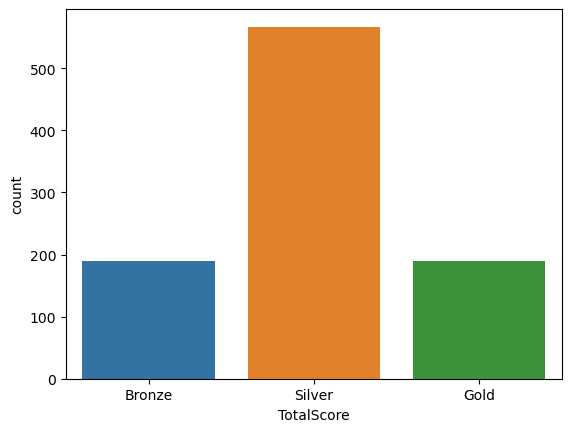

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

order_columns = ['Bronze', 'Silver', 'Gold']
sns.countplot(x='TotalScore', data=cp_df, order=order_columns)

<Axes: xlabel='ProductLevel', ylabel='Transaction'>

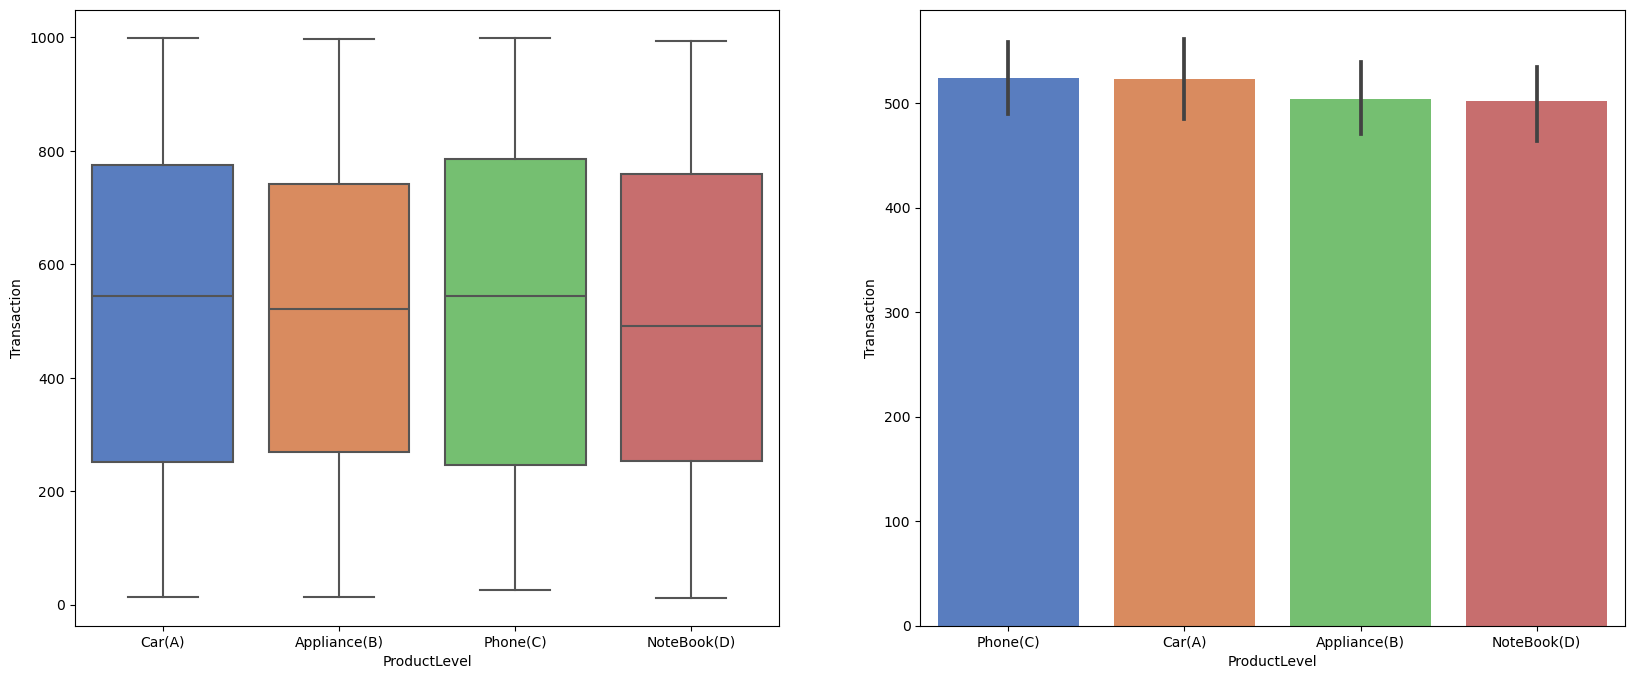

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(20, 8))
order_columns = ['Car(A)', 'Appliance(B)', 'Phone(C)','NoteBook(D)']

# 첫 번째 subplot에 boxplot 그리기
sns.boxplot(ax=axes[0], x='ProductLevel', y='Transaction', data=cp_df, palette='muted', order=order_columns)

# 두 번째 subplot에 boxplot  그리기
sns.barplot(ax=axes[1], x='ProductLevel', y='Transaction', data=cp_df, palette='muted')


<Axes: xlabel='LocationLevel', ylabel='Order'>

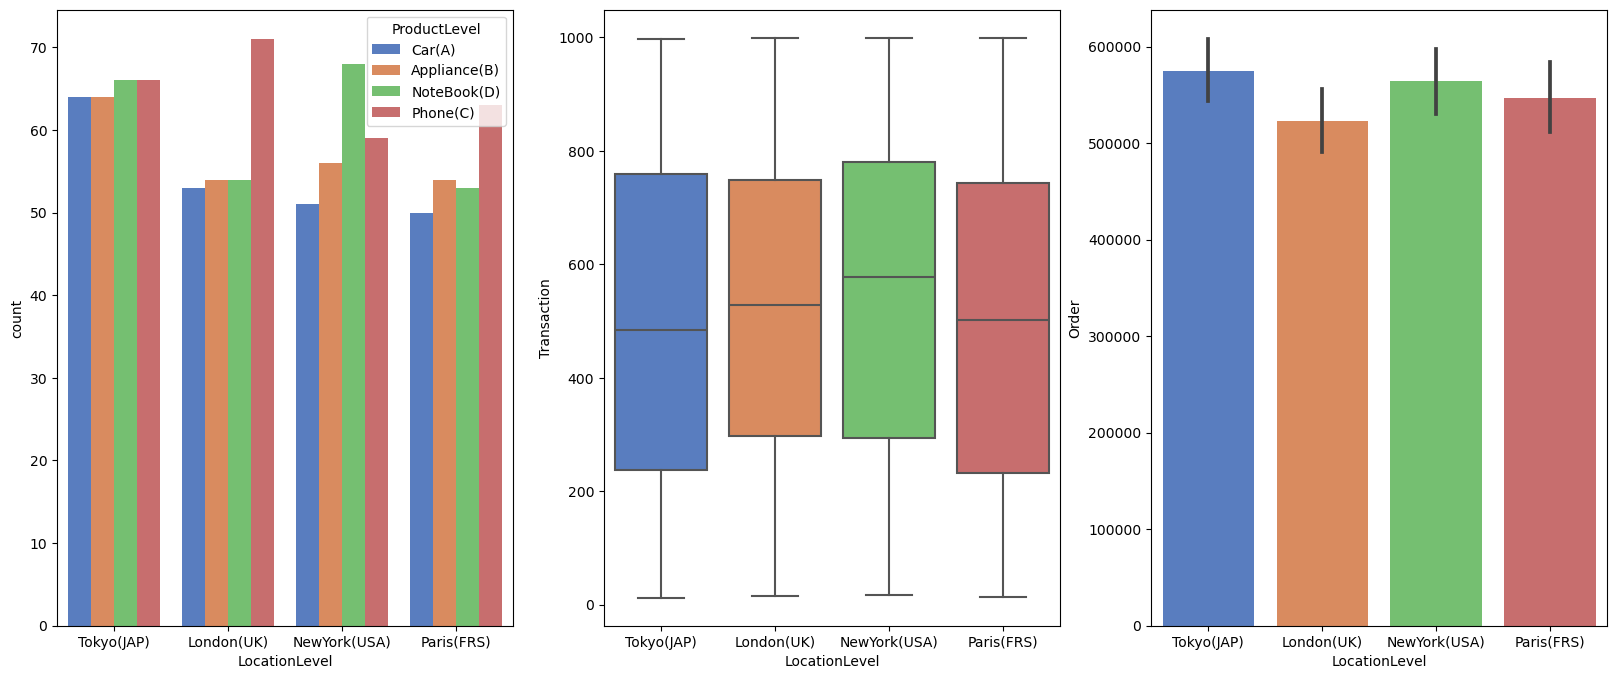

In [61]:
fig , axes = plt.subplots(1, 3, figsize=(20,8))
order_columns = ['Car(A)', 'Appliance(B)', 'NoteBook(D)', 'Phone(C)']
order_columns1 = ['Bronze', 'Silver', 'Gold']
sns.countplot(ax=axes[0], x='LocationLevel', hue='ProductLevel',data=cp_df, palette='muted', hue_order=order_columns)
sns.boxplot(ax=axes[1], x='LocationLevel', y='Transaction',data=cp_df, palette='muted')
sns.barplot(ax=axes[2], x='LocationLevel', y='Order', data=cp_df, palette='muted')
# sns.countplot(ax=axes[1], x='Marital_Status', hue='Level',data=cp_df, palette='muted', hue_order=order_columns)
# sns.countplot(ax=axes[2], x='Children', hue='Level',data=cp_df, palette='muted', hue_order=order_columns)

### 글로벌 상품 마케팅 전략
#### 도쿄
- 상품 구매 및 충성도가 높은 지역인 도쿄 내 고객들을 대상으로  VIP 고객 프로그램을 확대하고, 추가 혜택을 제공하여 고객들의 충성도를 더욱 높일 수 있습니다. 이를 통해 고객들은 더 많은 구매를 유도하고, 브랜드에 대한 신뢰도를 높일 것으로 기대됩니다.
도쿄의 경우, 모든 제품들이 균등하게 판매가 되어서, 이는 특정 제품에 치우치는 것이 아니라 모든 고객이 혜택을 누릴 수 있도록 보장합니다. 이러한 공정성은 고객들의 브랜드에 대한 신뢰도를 향상시키고 더 많은 구매를 유도할 것으로 기대됩니다.
- 
총평하자면, 도쿄 내 고객을 대상으로 하는 VIP 고객 프로그램은 고객들의 충성도를 높이고 브랜드에 대한 신뢰도를 향상시키는 데 효과적일 것입니다. 이는 도쿄 내의 고객들이 더 많은 구매를 유도하고 브랜드와의 긍정적인 관계를 유지할 수 있 도와줄 것입니다.
  
#### 런던

- 런던의 경우 핸드폰의 판매 비율이 매우 높은 반면, 다른 상품들은 비교적 낮은 판매 비율을 보입니다. 이러한 양극화를 해결하기 위해서는 런던 내의 고객들에게 핸드폰을 특별 세일이나 할인 혜택을 제공하여 다른 상품에 대한 관심을 유도할 수 있습니다.

- 첫째로, 런던 내의 핸드폰 세일은 기존 핸드폰 고객들을 유지하고 새로운 고객을 유치하는 데 도움이 될 것입니다. 이를 통해 다양한 고객층에게 브랜드의 다양한 제품에 대한 관심을 유도할 수 있습니다.

- 둘째로, 핸드폰 세일과 함께 다른 상품들에 대한 크로스 프로모션을 진행할 수 있습니다. 예를 들어, 핸드폰을 구매한 고객에게 다른 카테고리의 제품을 추가로 할인 혜택을 제공하여 다양한 상품에 대한 관심을 유도할 수 있습니다.

- 마지막으로, 런던 내의 매장에서 이벤트를 개최하거나 특정 기간 동안 제품을 체험할 수 있는 기회를 제공하는 등의 활동을 통해 고객들에게 브랜드와 상품에 대한 더 많은 경험을 제공할 수 있습니다.

- 총평하자면, 런던 내의 고객들에게 핸드폰을 중심으로 한 특별 세일 및 다양한 프로모션을 제공하여 다른 상품에 대한 관심을 높이는 것이 양극화를 해결하는 데 효과적일 것입니다. 이를 통해 다양한 상품의 판매 비율을 균형 있게 유지할 수 있고, 브랜드의 전체적인 매출을 향상시킬 수 있을 것입니다. 그리고 타 지역에 비해 런던지역 고객 들의 구매빈도수가 가장 낮은 점을 고려하여 런던 지역에 더 많은 상품 홍보 및 이벤트를 진행 시켜야 합니다.

#### 뉴욕
- 뉴욕의 경우 노트북의 판매 비율이 가장 높으며, 그 다음으로 핸드폰, 가전기기, 자동차 순으로 판매 비율을 보입니다. 이러한 경향을 바탕으로 뉴욕 내의 고객들에게 다양한 제품에 대한 마케팅 전략을 구상할 수 있습니다.

- 먼저, 노트북의 높은 인기를 바탕으로 뉴욕 내에서 노트북을 중심으로 한 프로모션을 진행할 수 있습니다. 예를 들어, 노트북을 구매하면 추가 악세서리를 무료로 제공하거나 특별 할인 혜택을 제공하여 고객들의 구매욕구를 높일 수 있습니다.

- 또한, 핸드폰과 가전기기에 대한 관심도 높은 것을 고려하여 이러한 제품들에 대한 새로운 기능이나 디자인에 대한 소식을 홍보하고, 이를 통해 고객들의 관심을 유도할 수 있습니다.

- 마지막으로, 자동차에 대한 관심도 높은 뉴욕 내의 고객들을 대상으로 자동차 관련 이벤트나 시승 기회를 제공하여 브랜드와의 긍정적인 경험을 유도할 수 있습니다.

- 총평하자면, 뉴욕 내의 고객들에게 노트북, 핸드폰, 가전기기, 자동차 등 다양한 제품에 대한 특별한 마케팅 전략을 제공하여 고객들의 구매욕구를 높이고 브랜드와의 긍정적인 관계를 구축할 수 있을 것입니다.

#### 파리 
- 파리의 경우 핸드폰의 판매 비율이 가장 높으며, 그 다음으로 가전기기, 노트북, 자동차 순으로 판매 비율을 보입니다. 이러한 경향을 바탕으로 파리 내의 고객들에게 다양한 제품에 대한 마케팅 전략을 구상할 수 있습니다.
- 첫째로, 핸드폰의 판매 비율이 높은 것을 고려하여 파리 내의 고객들에게 핸드폰 관련 제품이나 서비스에 대한 프로모션을 강화할 수 있습니다. 예를 들어, 새로운 모델의 출시를 기념하여 특별한 할인 혜택이나 이벤트를 제공하여 고객들의 관심을 끌 수 있습니다.
- 둘째로, 가전기기의 판매 비율이 높은 점을 고려하여 가전제품 관련 제품이나 서비스에 대한 홍보를 강화할 수 있습니다. 이를 통해 고객들의 가전제품에 대한 관심을 높일 수 있으며, 새로운 제품이나 기술의 소개를 통해 고객들에게 더 많은 선택지를 제공할 수 있습니다.
- 마지막으로, 노트북과 자동차의 판매 비율이 상대적으로 낮은 것을 고려하여 이에 대한 프로모션을 강화할 수 있습니다. 예를 들어, 노트북을 구매한 고객에게 자동차와 관련된 특별한 혜택을 제공하여 다양한 제품 간의 관심을 유도할 수 있습니다.
- 총평하자면, 파리 내의 각 제품 카테고리별 판매 비율을 고려하여 해당 제품에 대한 특별한 마케팅 전략을 제안할 수 있습니다. 이를 통해 고객들의 관심을 끌고 판매량을 증가시키는 데 도움이 될 것입니다.